In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import pickle


In [6]:
df_raw = pd.read_csv('../data/SIRTUIN6.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SC-5      100 non-null    float64
 1   SP-6      100 non-null    float64
 2   SHBd      100 non-null    float64
 3   minHaaCH  100 non-null    float64
 4   maxwHBa   100 non-null    float64
 5   FMF       100 non-null    float64
 6   Class     100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [7]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower().str.replace("-","_")
df_baking["class"] = df_baking["class"].astype("category")
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sc_5      100 non-null    float64 
 1   sp_6      100 non-null    float64 
 2   shbd      100 non-null    float64 
 3   minhaach  100 non-null    float64 
 4   maxwhba   100 non-null    float64 
 5   fmf       100 non-null    float64 
 6   class     100 non-null    category
dtypes: category(1), float64(6)
memory usage: 5.0 KB


In [8]:
df_train, df_test = train_test_split(df,test_size=0.2,random_state=2025,stratify=df["class"])
df_train.shape, df_test.shape

((80, 7), (20, 7))

In [20]:
df_train.sample(10,random_state=2025)

,sc_5,sp_6,shbd,minhaach,maxwhba,fmf,class
63,0.918546,5.64536,0.660618,0.479358,1.886880,0.307692,Low_BFE
7,0.359117,5.16718,0.000000,0.366074,2.268620,0.387097,High_BFE
29,0.373065,3.71563,0.420276,0.479832,1.993380,0.400000,High_BFE
76,0.428152,3.98745,0.834817,0.495192,1.868860,0.363636,Low_BFE
47,0.451184,3.28186,0.908275,0.613885,1.424980,0.320755,High_BFE
20,0.628917,7.27583,0.000000,0.452444,2.160270,0.462687,High_BFE
51,0.309489,3.43659,0.380631,0.461808,2.130290,0.350000,Low_BFE
81,0.788675,3.21249,0.378616,0.428933,2.094980,0.300000,Low_BFE
0,0.540936,7.64192,0.162171,0.445270,2.205570,0.467742,High_BFE
96,0.707068,4.58381,0.000000,0.000000,0.011251,0.153846,Low_BFE


In [9]:
display(df_train.describe(include="number").T)
display(df_train.describe(include="category").T)

,count,mean,std,min,25%,50%,75%,max
sc_5,80.0,0.428587,0.196025,0.083333,0.298191,0.400320,0.527367,0.918546
sp_6,80.0,4.471204,1.366880,2.291930,3.369698,4.107115,5.302952,7.641920
shbd,80.0,0.361302,0.324513,0.000000,0.000000,0.365423,0.491603,1.465000
minhaach,80.0,0.436764,0.141558,0.000000,0.427918,0.465345,0.499082,0.720723
maxwhba,80.0,1.914533,0.492538,0.009025,1.861687,2.039600,2.165720,2.420370
fmf,80.0,0.378330,0.071939,0.153846,0.331632,0.379365,0.429383,0.536585


,count,unique,top,freq
class,80,2,High_BFE,40


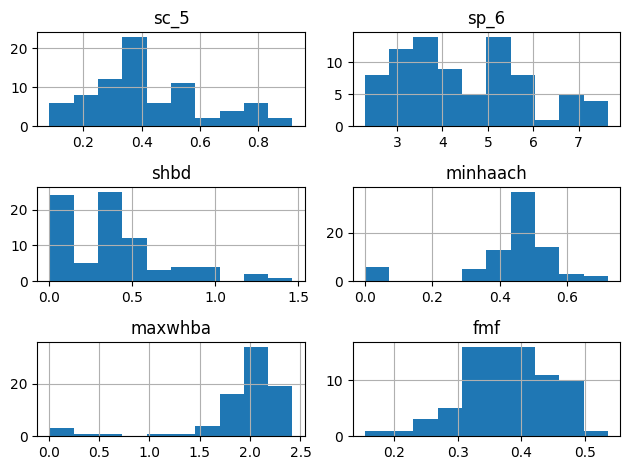

In [10]:
df_train.hist()
plt.tight_layout()
plt.show()

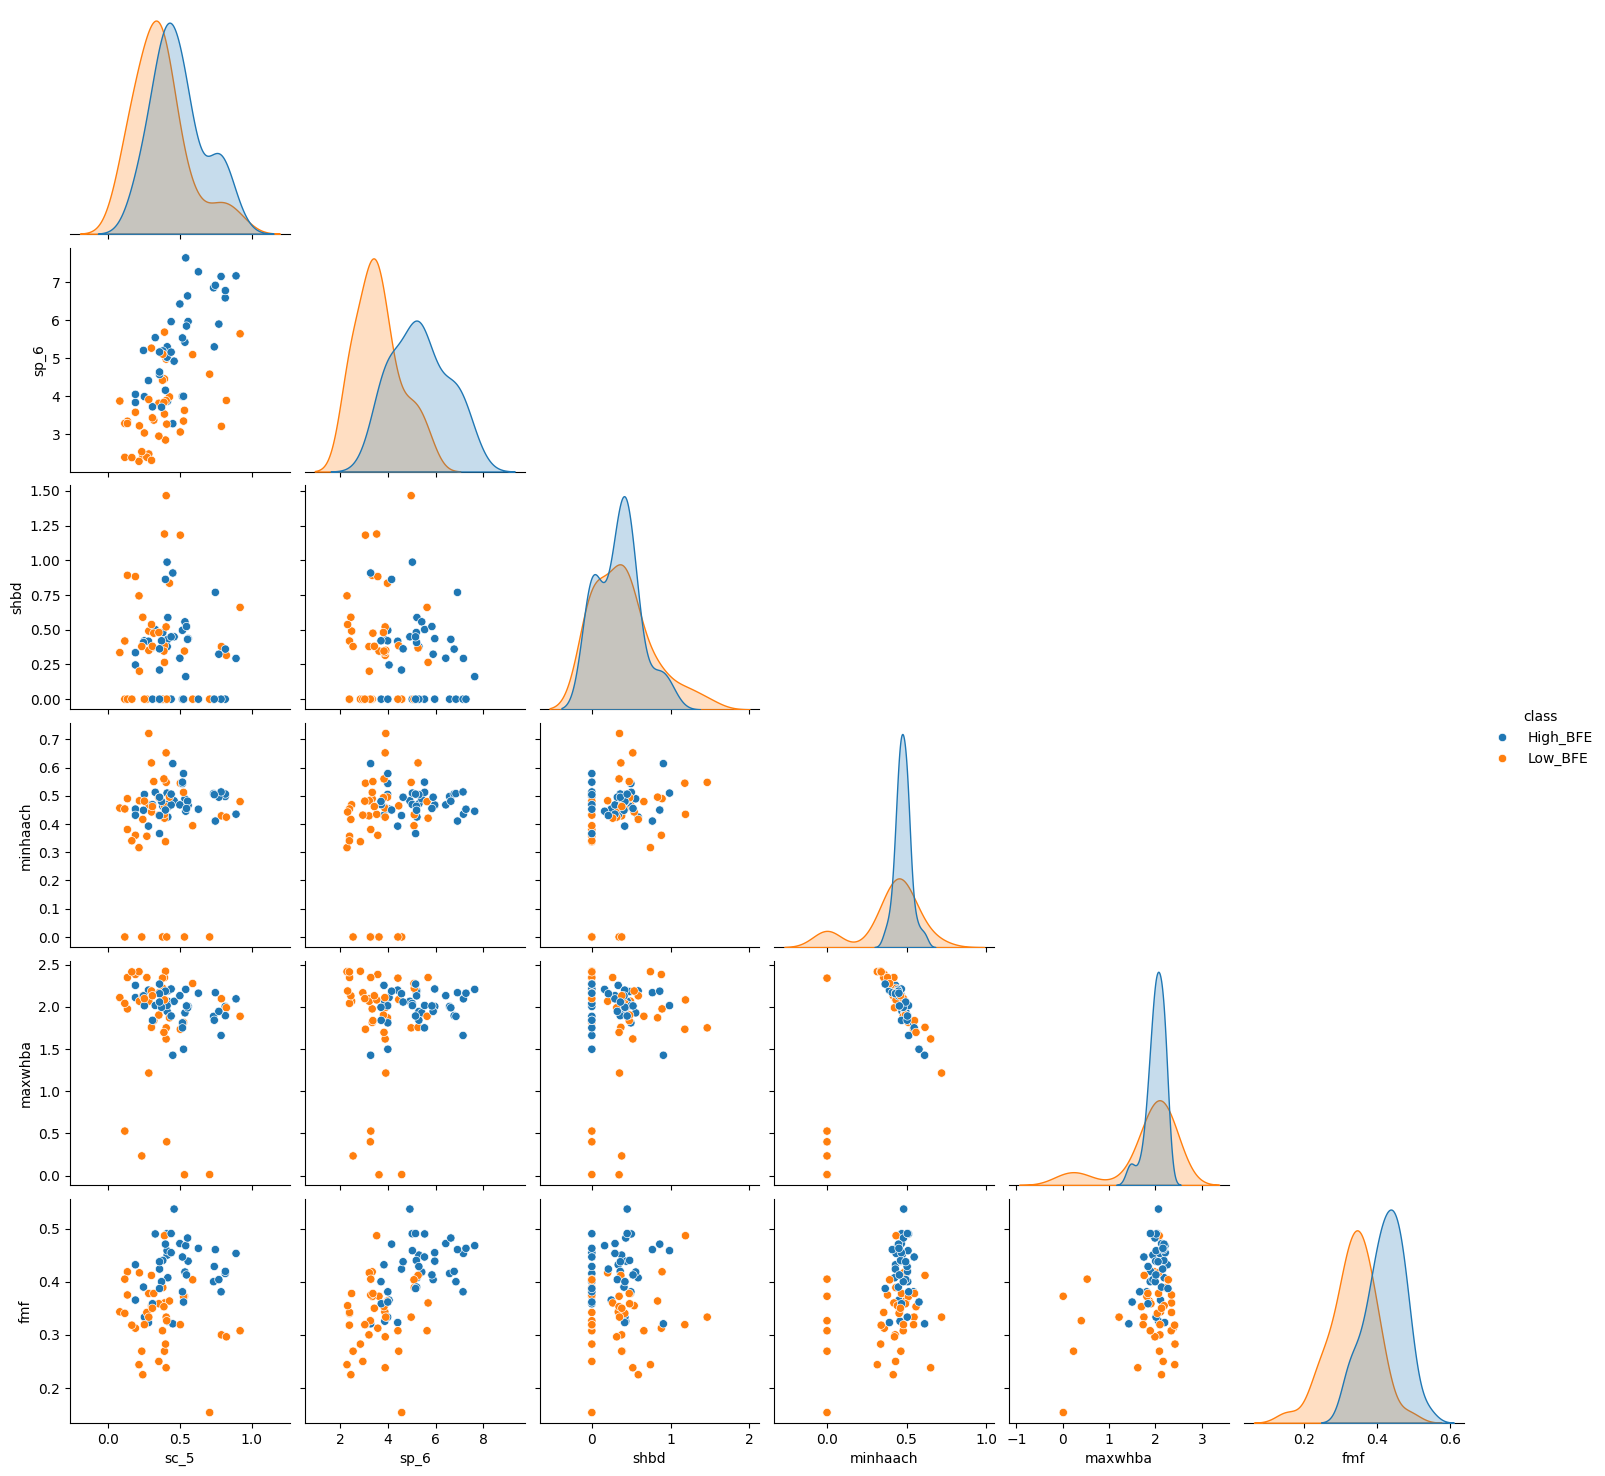

In [11]:
sns.pairplot(df_train,hue="class",corner=True)
plt.show()

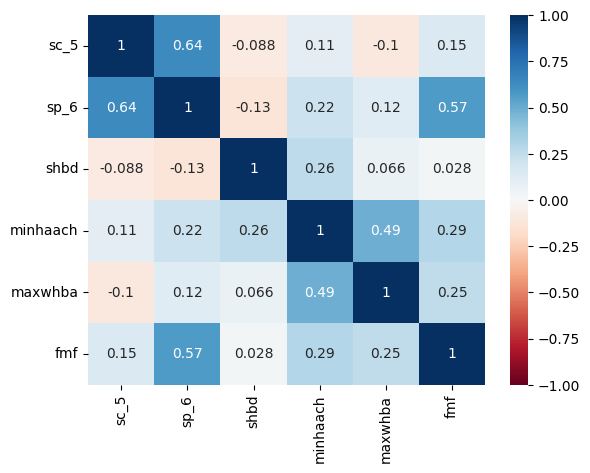

In [12]:
sns.heatmap(df_train.select_dtypes("number").corr(),vmax=1,vmin=-1,annot=True,cmap="RdBu")
plt.show()

In [13]:
label_encoder = LabelEncoder()

X_train = df_train.drop(columns=["class"])
y_train = df_train["class"]
y_train_enc = label_encoder.fit_transform(y_train)

X_test = df_test.drop(columns=["class"])
y_test = df_test["class"]
y_test_enc = label_encoder.fit_transform(y_test)

In [14]:
rf_clf = Pipeline([
    ("scaler",MinMaxScaler()),
    ("pred", RandomForestClassifier())
])
rf_clf.fit(X_train,y_train_enc)

,steps,"[('scaler', ...), ('pred', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [15]:
y_hat = rf_clf.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test_enc,y_hat):.2f}")

Accuracy Score: 0.90


In [16]:
print(classification_report(y_test_enc, y_hat, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

    High_BFE       1.00      0.80      0.89        10
     Low_BFE       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



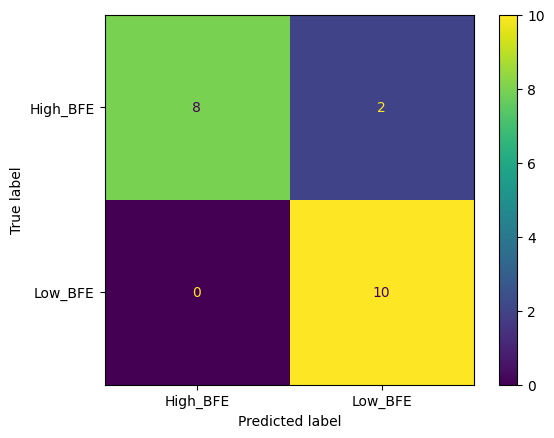

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_hat, display_labels=label_encoder.classes_)
plt.show()

In [18]:
artifact = {
    "name":"Prediction model for sirtuing6 cells",
    "author":"Eduardo Buysse",
    "model":rf_clf,
    "predictors":X_train.columns.to_list(),
    "target_name":y_train.name,
    "target_encoder":label_encoder,
    "version":"1.0",
    "algorithm_name":"Random Forest Classifier"
}

In [ ]:
with open("../models/sirtuin6.pkl", "wb") as file:
    pickle.dump(artifact, file)

